In [2]:
import numpy as np
from numpy import random
from math import e,pi,cos,sin
from math import pi
from numpy import log as ln

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


In [3]:
def distribution(sigma,  z_0):
    #random.seed(1)
    theta = 2* pi *random.random()
    #random.seed(2)
    r = (-2*sigma**2*ln(1-random.random()))**(1/2)
    x = r*cos(theta)
    y = r*sin(theta)
    return(x + z_0)

print(distribution(2, -1))

3.3779941300906104


In [5]:
is_list = [distribution(2,-1)]
for i in range(1000):
    is_list.append(distribution(2,-1))
print(is_list)

[-4.980350979521575, -2.067558358339104, -4.3770752998854645, -2.3280171521358994, -0.19097688865940343, 0.38790994108719756, -2.651481151966261, -0.07328830250689844, -0.7096211755931701, -0.7251342643333225, -1.0176419283244946, -1.2587474040595297, -2.037247656992696, -2.553079953121048, -1.8884970017570109, -1.964799627353805, 0.45505249709558515, -1.1254706134828383, 0.1805045590972334, -2.5093431997042424, -2.66408167607916, -5.039926903183267, 2.2893029388394326, 0.12324547246738038, -4.5860090164343426, -2.1341678736448206, 1.8089841893090863, -3.2194948665364747, -0.20933007269780346, 0.6903413507087417, -1.2528365735774534, -1.541776200335819, 2.9093748779628337, -2.7744334276033116, 1.2568045649282298, -1.1890311689362165, -5.4524905386333655, -2.1914636207306093, 1.308129493238261, -0.6050156592148643, -3.2542121291696477, 1.0714802391718656, -2.948151735454858, -1.0965529318646683, 1.6358194514456974, -1.7821219204358263, -0.857260892380407, -2.051001334038092, -3.68907590

In [18]:
average_of_list = sum(is_list)/len(is_list)
print(average_of_list)

-0.9555431884639024


In [19]:
arr_list = np.array(is_list)
top_frac = sum((arr_list-average_of_list)**2)
z_0_calc = (top_frac/(len(is_list)-1))**(1/2)
print(z_0_calc)

2.0140562185292756


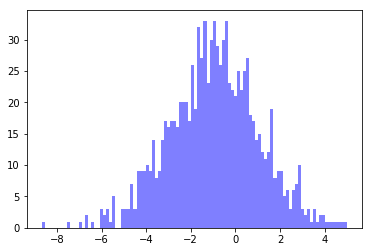

In [20]:
x = is_list
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [24]:
#2) Radioactive Decay

from random import random
from numpy import arange
from matplotlib import pyplot as plt

In [25]:
#Code given as a clue, Tl-Pb

#Constants
NTl = 1000
NPb = 0
tau_1 = 3.053*60
h = 1.0
p = 1 - 2**(-h/tau_1)
tmax = 1000

In [26]:
#create lists of atoms
tpoints = arange(0.0, tmax, h)
Tlpoints = []
Pbpoints = []

#Main Loop
for t in tpoints:
    Tlpoints.append(NTl)
    Pbpoints.append(NPb)
    
    #calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if random() < p:
            decay += 1
    NTl -= decay
    NPb += decay

print(NTl, NPb)    

22 978


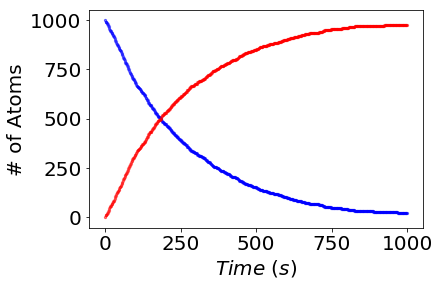

In [27]:
#Plot figure as a function of time:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpoints,Tlpoints,s=5,c='b',alpha=0.3)
ax.scatter(tpoints,Pbpoints,s=5,c='r',alpha=0.3)
ax.set_xlabel("$Time$ $(s)$", size=20)
ax.set_ylabel("# of Atoms", size=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

In [1]:
#I need to calculate it backwards or I get extra atoms
#The Tl and Pb need to be in the same loop

from random import random
from numpy import arange
from matplotlib import pyplot as plt

#constants
NBi_213 = 10000                          # # of Bi_213 atoms
NTl = 0                                  # # of Thulium atoms
NPb = 0                                  # # of Lead atoms
NBi9 = 0                                 # # of Bi_209 atoms
tau_1 = 45.59*60                         # .5 life of Bi_213 (s)
tau2 = 2.2*60                            # .5 life of Tl (s)
tau3 = 3.3*60                            # .5 life of Tl (s)
h = 1.0                                  # time step (s)
p = 1 - 2**(-h/tau_1)                    # Bi_213 prob of decay in 1 step (s)
p2 = 1 - 2**(-h/tau2)                    # Tl prob of decay in one step
p3 = 1 - 2**(-h/tau3)                    # Pb prob of decay in one step
tmax = 20000                             # total time

#create list of atoms
tpoints = arange(0.0, tmax, h)
Bi_213points = []
Pbpoints = []
Tlpoints = []
Bi9points = []

#Main Loop
for t in tpoints:
    Bi_213points.append(NBi_213)
    Pbpoints.append(NPb)
    Tlpoints.append(NTl)
    Bi9points.append(NBi9)
    
#calculate number of atoms that decay

    decay = 0
    decayTl = 0
    decayPb = 0
    decay2 = 0
    decay3 = 0
    for i in range(NPb):
        if random() < p3:
            decay3 +=1
    NPb -= decay3
    NBi9 += decay3
    for i in range(NTl):
        if random() < p2:
            decay2 +=1
    NTl -= decay2
    NPb += decay2
    for i in range(NBi_213):
        if random() < p:
            decay +=1
            if random() < .0209: 
                decay -= 1
                decayTl += 1
            else:
                decay -= 1
                decayPb += 1
    NBi_213 -= decayPb + decayTl
    NPb += decayPb
    NTl += decayTl
    
print(NBi_213, NTl, NPb, NBi9)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpoints, Bi_213points, s=5, c='b', alpha=0.3)
ax.scatter(tpoints, Tlpoints, s=5, c='r', alpha=0.3)
ax.scatter(tpoints, Pbpoints, s=5, c='g', alpha=0.3)
ax.scatter(tpoints, Bi9points, s=5, c='y', alpha=0.3)
ax.set_xlabel("$Time$ $(s)$", size=20)
ax.set_ylabel("# of Atoms", size=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

71 0 9 9920
